### Import the Libraries

In [10]:
import pandas as pd
from matplotlib.pyplot import scatter

### Import the dataSet - load_boston

In [11]:
from sklearn.datasets import load_boston

boston_r = load_boston()
print(boston_r.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

### Reshape of Dataset

In [12]:
boston = pd.DataFrame(boston_r.data,columns=boston_r.feature_names)
boston["Price"] = boston_r.target

x = boston_r.data
y = boston_r.target
print(x.shape, y.shape)
boston.head()

(506, 13) (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Split the DataSet

In [13]:
from sklearn.model_selection import train_test_split

training_x, testing_x = train_test_split(x, test_size=0.2, random_state=0)
training_y, testing_y = train_test_split(y, test_size=0.2, random_state=0)

print(f"Training Data X: {training_x.shape}\tTesting Data X: {testing_x.shape}")
print(f"Training Data Y: {training_y.shape}\t\tTesting Data Y: {testing_y.shape}")

Training Data X: (404, 13)	Testing Data X: (102, 13)
Training Data Y: (404,)		Testing Data Y: (102,)


### Fitting Simple Linear Regression Model to the training set

In [14]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(training_x, training_y)


LinearRegression()

### Predicting the Result

Intercept :	 38.09169492630246
Slope : 
 [-1.19443447e-01  4.47799511e-02  5.48526168e-03  2.34080361e+00
 -1.61236043e+01  3.70870901e+00 -3.12108178e-03 -1.38639737e+00
  2.44178327e-01 -1.09896366e-02 -1.04592119e+00  8.11010693e-03
 -4.92792725e-01]


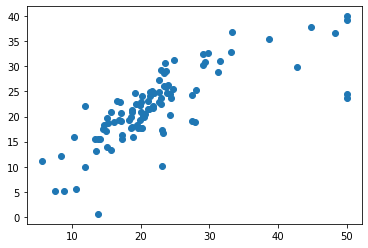

In [15]:
predicted_train_y = model.predict(training_x)
predicted_test_y = model.predict(testing_x)

print("Intercept :\t", model.intercept_)
print("Slope : \n", model.coef_) 


scatter(testing_y, predicted_test_y)

### Evaluation - MSE & MAE

In [16]:
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

#mean squared error:
mse_test = mean_squared_error(testing_y, predicted_test_y)
mse_train = mean_squared_error(training_y, predicted_train_y)
print(f"MSE Train: {mse_train}\t MSE Test: {mse_test}")

#mean absolute error:
mae_test = mean_absolute_error(testing_y,predicted_test_y)
mae_train = mean_absolute_error(training_y,predicted_train_y)
print(f"MAE Train: {mae_train}\t MAE Test: {mae_test}")

#coefficient of determination
r2_test = r2_score(testing_y, predicted_test_y)
r2_train = r2_score(training_y,predicted_train_y)
print(f"R^2 Train: {r2_train}\t R^2 Test: {r2_test}")

MSE Train: 19.326470203585725	 MSE Test: 33.44897999767653
MAE Train: 3.10315639657943	 MAE Test: 3.842909220444498
R^2 Train: 0.7730135569264234	 R^2 Test: 0.5892223849182507
